Target variable enumerates the condition as either malignant = 0, or benign = 1

In [19]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [20]:
#Importing dataset from sklearn
from sklearn.datasets import load_breast_cancer
#Import classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
# Import train_test_split
from sklearn.model_selection import train_test_split
# Import StandardScaler library
from sklearn.preprocessing import StandardScaler
# Import libraries for getting model metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,recall_score

In [21]:
#Loading dataset from library as a Numpy array
raw_data = load_breast_cancer()
raw_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [22]:
#Creating dataframe from Numpy array
data_df = pd.DataFrame(raw_data.data,columns =[raw_data.feature_names])
data_target = pd.DataFrame(raw_data.target,index=data_df.index, columns=["target"])
data_df = pd.concat([data_df,data_target],axis=1)
data_df.head()

,"(mean radius,)","(mean texture,)","(mean perimeter,)","(mean area,)","(mean smoothness,)","(mean compactness,)","(mean concavity,)","(mean concave points,)","(mean symmetry,)","(mean fractal dimension,)",...,"(worst texture,)","(worst perimeter,)","(worst area,)","(worst smoothness,)","(worst compactness,)","(worst concavity,)","(worst concave points,)","(worst symmetry,)","(worst fractal dimension,)",target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
"(mean radius,)",569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
"(mean texture,)",569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
"(mean perimeter,)",569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
"(mean area,)",569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
"(mean smoothness,)",569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
"(mean compactness,)",569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
"(mean concavity,)",569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
"(mean concave points,)",569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
"(mean symmetry,)",569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
"(mean fractal dimension,)",569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [24]:
# Checks for any null values in the dataframe
data_df.isnull().sum()

(mean radius,)                0
(mean texture,)               0
(mean perimeter,)             0
(mean area,)                  0
(mean smoothness,)            0
(mean compactness,)           0
(mean concavity,)             0
(mean concave points,)        0
(mean symmetry,)              0
(mean fractal dimension,)     0
(radius error,)               0
(texture error,)              0
(perimeter error,)            0
(area error,)                 0
(smoothness error,)           0
(compactness error,)          0
(concavity error,)            0
(concave points error,)       0
(symmetry error,)             0
(fractal dimension error,)    0
(worst radius,)               0
(worst texture,)              0
(worst perimeter,)            0
(worst area,)                 0
(worst smoothness,)           0
(worst compactness,)          0
(worst concavity,)            0
(worst concave points,)       0
(worst symmetry,)             0
(worst fractal dimension,)    0
target                        0
dtype: i

In [25]:
data_df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

<AxesSubplot:title={'center':'Comparison of malignant and benign cases'}, xlabel='target', ylabel='count'>

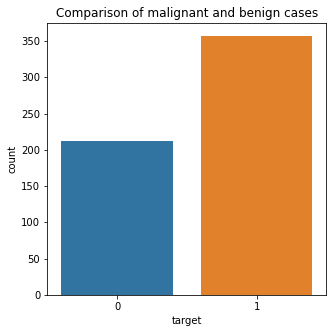

In [27]:
plt.figure(figsize=(5,5))
plt.title('Comparison of malignant and benign cases')
plt.xlabel('Target')
plt.ylabel('Count of cases')
sns.countplot(x='target',data=data_df)

In [9]:
#Defining x and y for training and testing
x = data_df.iloc[:,0:29]
y = data_df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [10]:
#Splitting x and y into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [11]:
# Using StandardScaler to make all values in the x_train and x_test fit between 0 and 1
scaler = StandardScaler()
scaler.fit(x)
scaler.transform(x_train)
scaler.transform(x_test)

array([[ 1.10842455, -0.56772258,  1.05162563, ...,  0.75230694,
         0.59221988, -0.09505385],
       [ 0.42111019,  0.0210254 ,  0.33079712, ..., -0.22159034,
        -0.44044795, -0.35228097],
       [-0.20656118, -0.54445191, -0.26728458, ..., -0.65144844,
        -0.68118046, -0.25844969],
       ...,
       [ 3.77531785,  1.62437465,  3.91022552, ...,  1.97231717,
         2.251919  , -0.42022775],
       [-0.75470858, -0.75854209, -0.78051448, ..., -0.83456992,
        -0.74802522, -0.08049383],
       [-0.74334801,  1.07984094, -0.71872918, ...,  0.43567039,
        -0.27523937, -1.2760337 ]])

In [12]:
# Creating kNN classifier object and training the model
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [13]:
# Predicting using the x_test data
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1])

In [14]:
# Actual test data vs the Predicted data
comparison_df = pd.DataFrame({
    'Predicted y': y_pred,
    'Actual y test': y_test
})
comparison_df

,Predicted y,Actual y test
444,0,0
263,0,0
364,1,1
335,0,0
473,1,1
...,...,...
77,0,0
454,1,1
461,0,0
348,1,1


In [ ]:
#Performance measure

In [15]:
# Confusion matrix
confusion_matrix(y_test,y_pred,labels=[0,1])

array([[40,  2],
       [ 1, 71]], dtype=int64)

In [16]:
# f1 Score
f1_score(y_test,y_pred,labels=1)

0.9793103448275863

In [17]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9736842105263158

In [18]:
# Recall
recall_score(y_test,y_pred,pos_label=0)

0.9523809523809523